The final question it is related occupation  

WHAT POST THIS PEOPLE OCCUPIED?

In column DevType is possible see what obligations each one have. Here I tried to understand which jobs would have the greatest number of people and which ones are still there would be more vacancies to be filled.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  collections import defaultdict


%matplotlib inline

In [2]:
df = pd.read_csv('Desktop/documentos/projetos/data_science/nano/project_one/survey_results_public_2020.csv')




In [3]:
schema = pd.read_csv('Desktop/documentos/projetos/data_science/nano/project_one/survey_results_schema_2020.csv')

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [6]:
schema[schema['Column'] == 'DevType'][schema.columns[-1]].values[0]

'Which of the following describe you? Please select all that apply.'


UNDERSTANDING DATA 


In [7]:
df['DevType']

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64461, dtype: object


PREPARING DATA 

How each person can choose more one option, I filtered and cleand data for after I tried to split the answer to take just one type of each option, along the analyses step.

In [8]:
# This filter take only the group of interest for this notebook 

df = df[(df['MainBranch'] == 'I am a developer by profession') & (df['UndergradMajor'] != 'Computer science, computer engineering, or software engineering')] 

In [9]:
# cleaned the data for the third question 

df['DevType'].isnull().sum()

4465

In [10]:
df['DevType'].dropna()

5          Designer;Developer, front-end;Developer, mobile
9        Database administrator;Developer, full-stack;D...
11                           Designer;Developer, front-end
19           Developer, desktop or enterprise applications
22       Developer, back-end;Developer, desktop or ente...
                               ...                        
64144                                  Developer, back-end
64147           Developer, full-stack;System administrator
64153    Developer, full-stack;Developer, QA or test;Sy...
64154                                 Developer, front-end
64158    Developer, back-end;Developer, desktop or ente...
Name: DevType, Length: 16400, dtype: object

In [11]:
# I this there is each single possible response from resarch

types= ['Academic researcher','Data or business analyst','Data scientist or machine learning specialist',
        'Database administrator','Designer','Developer, back-end','Developer, desktop or enterprise applications',
        'Developer, embedded applications or devices','Developer, front-end','Developer, full-stack',
        'Developer, game or graphics','Developer, mobile','Developer, QA or test','DevOps specialist',
        'Educator','Engineer, data','Engineer, site reliability','Engineering manager','Marketing or sales professional',
        'Product manager','Scientist','Senior Executive (C-Suite, VP, etc.)','System administrator','Other']

RESULTS

the next cells theere two fucton to take the data, compare with "type" variable, and return a single response.   

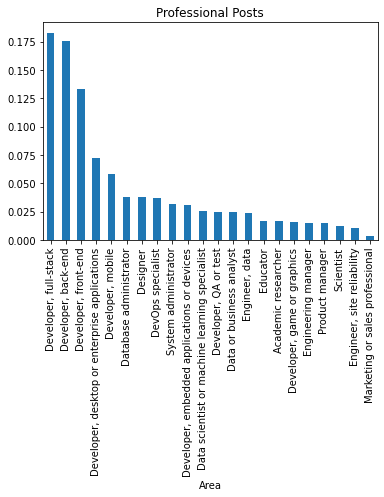

In [12]:
def unique_response(df, col1, col2, look_for):
     
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column with the values for count
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    ''' 
        
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range (df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1,col2]
    new_df.sort_values('Total', ascending= False, inplace=True)
    return new_df

def clean_and_plot(df, title='Professional Posts', plot=True):

    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        types programmers there is the origianl dataframe
    '''
    
    dev_type = df['DevType'].value_counts().reset_index()
    dev_type.rename(columns={'index': 'Area', 'DevType':'Total'}, inplace= True)
    dev_type_df = unique_response(dev_type, 'Area', 'Total', types)

    dev_type_df.set_index('Area', inplace=True)
    if plot:
        (dev_type_df/dev_type_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    unique_dev_type_df = dev_type_df/dev_type_df.sum()
    return  unique_dev_type_df
    
types_df = clean_and_plot(df)

In [13]:
# here is possible to see without the plot, just the table 

dev_type = df['DevType'].value_counts().reset_index()
dev_type.rename(columns={'index': 'Area', 'DevType':'Total'}, inplace= True)
dev_type_df = unique_response(dev_type, 'Area', 'Total', types)

In [14]:
dev_type_df

,Area,Total
9,"Developer, full-stack",9470
5,"Developer, back-end",9108
8,"Developer, front-end",6879
6,"Developer, desktop or enterprise applications",3745
11,"Developer, mobile",3017
3,Database administrator,1983
4,Designer,1943
13,DevOps specialist,1900
21,System administrator,1660
7,"Developer, embedded applications or devices",1595



Looking the analyses is possible to see that the technology area accepeted very well the group of people that want change your carrer, and in some countries the percentage of this group it is almost half of the total. For the people that want to move now, there is a lot of post that still have a low number of professional, one times that there is more developer, in general, than others posts.


GENERAL CONCLUSIONS 

· There is a lot of people working with a professional programmer, even when they area not graduated in Computer Science. The area seems to accept every well the person of this profile.

· The countries with the highest quantity of programmers, it is too the most equilibrate in relation of differences area graduation (IT and NO IT).

· The professional sometimes can have several obligations in your routine, but there most developers working than other technology professionals (Within the options of the survey).
